In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
from matplotlib.colors import LogNorm

from tqdm import tqdm

In [3]:
cosmic = pd.read_csv('../data/raw/cosmic.csv.gz')

In [4]:
cosmic.shape

(10661138, 29)

In [5]:
print(cosmic.columns)
cosmic.head()

Index(['Channel', 'ADC_ADC_Sig', 'ADC_ADC_bg', 'Board', 'Nhit', 'Asic_TDC0',
       'Asic_ADC0', 'Asic_TOT0', 'Asic_TDC1', 'Asic_ADC1', 'Asic_TOT1',
       'Asic_TDC2', 'Asic_ADC2', 'Asic_TOT2', 'Asic_TDC3', 'Asic_ADC3',
       'Asic_TOT3', 'Asic_TDC4', 'Asic_ADC4', 'Asic_TOT4', 'Asic_TDC5',
       'Asic_ADC5', 'Asic_TOT5', 'Asic_TDC6', 'Asic_ADC6', 'Asic_TOT6',
       'Asic_TDC7', 'Asic_ADC7', 'Asic_TOT7'],
      dtype='object')


,Channel,ADC_ADC_Sig,ADC_ADC_bg,Board,Nhit,Asic_TDC0,Asic_ADC0,Asic_TOT0,Asic_TDC1,Asic_ADC1,...,Asic_TOT4,Asic_TDC5,Asic_ADC5,Asic_TOT5,Asic_TDC6,Asic_ADC6,Asic_TOT6,Asic_TDC7,Asic_ADC7,Asic_TOT7
0,41,56,0,3,1,-1,-1,-1,4884,56,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,14,83,0,15,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,4863,83,6,-1,-1,-1
2,15,43,0,34,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,4817,43,7
3,12,110,0,35,1,-1,-1,-1,-1,-1,...,7,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,12,224,0,56,1,-1,-1,-1,-1,-1,...,7,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [6]:
cosmic['ASIC'] = cosmic['Channel'] // 8
cosmic['ASIC_Channel'] = cosmic['Channel'] % 8

In [7]:
cosmic.head()

,Channel,ADC_ADC_Sig,ADC_ADC_bg,Board,Nhit,Asic_TDC0,Asic_ADC0,Asic_TOT0,Asic_TDC1,Asic_ADC1,...,Asic_ADC5,Asic_TOT5,Asic_TDC6,Asic_ADC6,Asic_TOT6,Asic_TDC7,Asic_ADC7,Asic_TOT7,ASIC,ASIC_Channel
0,41,56,0,3,1,-1,-1,-1,4884,56,...,-1,-1,-1,-1,-1,-1,-1,-1,5,1
1,14,83,0,15,1,-1,-1,-1,-1,-1,...,-1,-1,4863,83,6,-1,-1,-1,1,6
2,15,43,0,34,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,4817,43,7,1,7
3,12,110,0,35,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,4
4,12,224,0,56,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,4


In [8]:
board = cosmic[cosmic['Board'] == 0]
board.head()

,Channel,ADC_ADC_Sig,ADC_ADC_bg,Board,Nhit,Asic_TDC0,Asic_ADC0,Asic_TOT0,Asic_TDC1,Asic_ADC1,...,Asic_ADC5,Asic_TOT5,Asic_TDC6,Asic_ADC6,Asic_TOT6,Asic_TDC7,Asic_ADC7,Asic_TOT7,ASIC,ASIC_Channel
337,38,74,0,0,1,-1,-1,-1,-1,-1,...,-1,-1,4852,74,6,-1,-1,-1,4,6
394,12,83,0,0,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,4
436,17,56,0,0,1,-1,-1,-1,4880,56,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1
581,14,111,0,0,1,-1,-1,-1,-1,-1,...,-1,-1,4719,111,8,-1,-1,-1,1,6
1015,38,72,0,0,1,-1,-1,-1,-1,-1,...,-1,-1,4735,72,6,-1,-1,-1,4,6


In [9]:
board[board['ADC_ADC_bg'] != 0]

,Channel,ADC_ADC_Sig,ADC_ADC_bg,Board,Nhit,Asic_TDC0,Asic_ADC0,Asic_TOT0,Asic_TDC1,Asic_ADC1,...,Asic_ADC5,Asic_TOT5,Asic_TDC6,Asic_ADC6,Asic_TOT6,Asic_TDC7,Asic_ADC7,Asic_TOT7,ASIC,ASIC_Channel
22210,17,889,10,0,7,-1,-1,-1,4712,889,...,4,1,4661,10,1,4661,8,1,2,1
36442,12,99,21,0,6,-1,-1,-1,4681,13,...,7,1,4679,17,3,4677,21,3,1,4
50152,33,101,2,0,2,4484,2,1,4823,101,...,-1,-1,-1,-1,-1,-1,-1,-1,4,1
53828,9,227,67,0,3,4584,53,4,4816,227,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
171199,32,944,8,0,8,4904,944,2,4866,0,...,6,1,4866,8,1,4866,8,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10529472,26,99,6,0,2,-1,-1,-1,-1,-1,...,-1,-1,4682,6,2,-1,-1,-1,3,2
10558573,46,1318,183,0,8,4753,154,2,4753,164,...,183,2,4836,1318,5,4754,167,2,5,6
10604745,15,1402,54,0,8,4493,49,2,4493,53,...,54,2,4489,49,2,4832,1402,10,1,7
10631134,1,73,10,0,2,-1,-1,-1,4819,73,...,10,3,-1,-1,-1,-1,-1,-1,0,1


(array([114.,  67.,   0.,  42.,   0.,  20.,  17.,   0.,  16.,  85.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <a list of 10 Patch objects>)

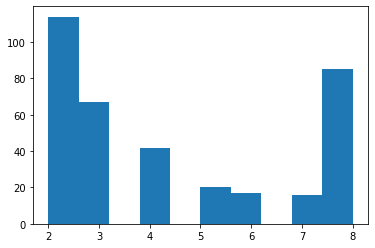

In [276]:
plt.hist(board[board['ADC_ADC_bg'] != 0]['Nhit'])

In [300]:
tots = np.zeros((6, 8)) - 1
adcs = np.zeros((6, 8)) - 1
times = np.zeros((6, 8)) - 1

index_start, index_end = 0, 1015
# print(f"Total events in range: {len(board.loc[index_start:index_end])}")

for index, event in tqdm(board.loc[index_start:index_end].iterrows(), position=0):
    tot_event = event[[i for i in board.columns if 'Asic_TOT' in i]].values.reshape(-1)
    tots[event['ASIC']][tot_event != -1] = tot_event[tot_event != -1]
    adc_event = event[[i for i in board.columns if 'Asic_ADC' in i]].values.reshape(-1)
    adcs[event['ASIC']][adc_event != -1] = adc_event[adc_event != -1]
    
    times[event['ASIC']][adc_event != -1] = index - index_start

5it [00:00, 479.40it/s]


In [301]:
def plot_heatmap(data, log_scale=False):
    if log_scale:
        data[data < np.exp(-1)] = np.exp(-1)

        min_range, max_range = data.min(), data.max()
        log_norm = LogNorm(vmin=min_range, vmax=max_range)
        cbar_ticks = [10 ** i for i in range(int(np.floor(np.log10(min_range))),
                                             1 + int(np.ceil(np.log10(max_range))))]
        sns.heatmap(data, norm=log_norm, cbar_kws={"ticks": cbar_ticks})
    else:
        sns.heatmap(data)


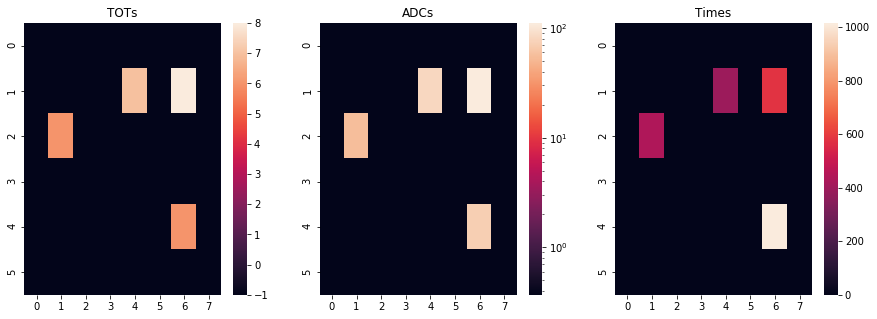

In [302]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('TOTs')
plot_heatmap(tots)
plt.subplot(132)
plt.title('ADCs')
plot_heatmap(adcs, log_scale=True)
plt.subplot(133)
plt.title('Times')
plot_heatmap(times, log_scale=False)
plt.show()

In [285]:
mc_noct = pd.read_csv('../data/raw/mcmc_noxtalk.csv.gz')

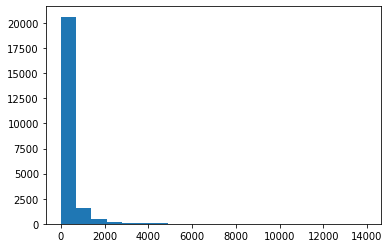

In [295]:
plt.hist(mc_noct[mc_noct['ADC_ADC_bg'] != 0]['ADC_ADC_bg'], bins=20)
plt.show()

In [305]:
!nvidia-smi

Thu Apr 16 18:39:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 0000666E:00:00.0 Off |                    0 |
| N/A   52C    P0    72W / 149W |  11225MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K80           On   | 0000A3CE:00:00.0 Off |                    0 |
| N/A   69C    P0    58W / 149W |   2820MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T